Assignment 02\
190639B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import linalg

In [2]:
# np . random . seed ( 0 )
N=100
half_n=N//2
r=10
s=r/16
t=np.random.uniform(0,2*np.pi,half_n)
n=s*np.random.randn(half_n)
x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b=-1,2
x=np.linspace(-12,12,half_n )
y=m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X= np.vstack((X_circ,X_line))

In [3]:
def random_points():
    sample=[]
    for r in range(0,3):
        random_index=np.random.randint(len(X))
        sample.append(X[random_index])
    return sample

def model_circle():
    sample=random_points()
    p1,p2,p3=sample[0],sample[1],sample[2]
    A=np.array([[2*p1[0]-2*p2[0],2*p1[1]-2*p2[1]],[2*p2[0]-2*p3[0],2*p2[1]-2*p3[1]]])
    B=np.array([[p1[0]**2-p2[0]**2+p1[1]**2-p2[1]**2],[p2[0]**2-p3[0]**2+p2[1]**2-p3[1]**2]])
    center=np.matmul(linalg.pinv(A),B)
    radius=np.sqrt((p1[0]-center[0][0])**2+(p1[1]-center[1][0])**2)
    return center,radius,sample

def check_neighbour(x,y,a,b,r):
    return (x-a)**2+(y-b)**2-r**2

def check_model():
    while True:
        new_X=[]
        threshold_value=1
        center,radius,sample=model_circle()
        a,b=center[0][0],center[1][0]
        for i in X:
            if check_neighbour(i[0],i[1],a,b,radius+threshold_value)<=0:
                if check_neighbour(i[0],i[1],a,b,radius-threshold_value)>=0:
                    new_X.append(i)
        if (len(new_X)/len(X))>=0.52 and -10<a<10 and -15<b<15:
            return a,b,radius,np.array(new_X),np.array(sample)

    
a,b,r,new_X,sample=check_model()


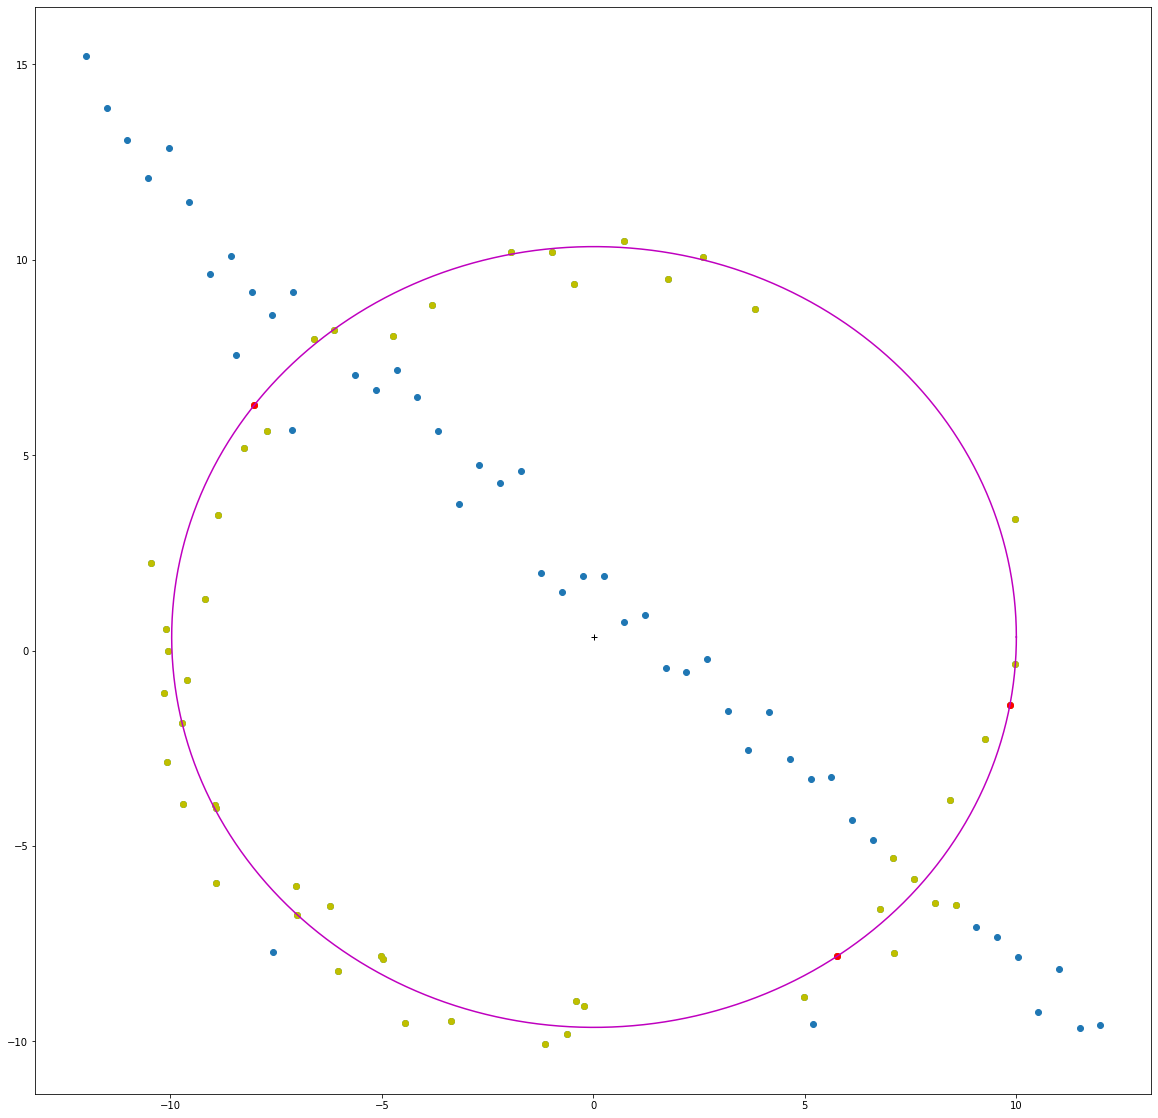

In [10]:
t=np.linspace(0,2*np.pi,1000)
y=b+r*np.sin(t)
x=a+r*np.cos(t)
fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(X[:,0],X[:,1])
ax.scatter(new_X[:,0],new_X[:,1],c='y')
ax.scatter(sample[:,0],sample[:,1],c='r')
ax.plot(x,y,c='m')
ax.plot(a,b,'k+')
plt.show()